## Shelling's Segregation Model: Two-dimensional

We implement the Schelling's segregation model on a two-dimensional grid as follows:

### Defining the Agent and the Environment

In [4]:
import numpy as np
import copy
import os
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
def check_proportion( list_of_items , item ): 
    '''function to get fraction of times ‘item’ is encountered in ‘list_of_items’'''
    n=len(list_of_items) # length of list
    count=0 # initialize counter to zero
    for x in list_of_items: # loop over elements in the list
        if x==item: # if element is equal to item increment the counter
            count+=1
    return count/n # return proportion

In [6]:
class Agent:
    ''' Class definition of the Agent in Schelling 1D model'''
    
    def __init__(self,location,race,neighbors,threshold): #Object constructor
        ''' Initialize agent.
                location -- location of the agent
                race -- race of the agent
                neighborhood -- list of neighbors
                threshold -- similarity threshold
        '''
        self.loc = location
        self.race = race
        self.neighborhood = neighbors
        self.thresh = threshold
        
    def satisfied(self): 
        '''function that returns True of False depending if the threshold is met'''
        return check_proportion(self.neighborhood,self.race)>=self.thresh
    
    def moveToNewLoc(self,newLoc,newNeighbors): 
        '''function that updates the new neighborhood info'''
        self.loc=newLoc
        self.neighborhood=copy.deepcopy(newNeighbors)
    
    def __repr__(self):
        return "Location:"+str(self.loc)+" Race:"+str(self.race)+" Neighbors:"+str(self.neighborhood)
    def __str__(self):
        return "L"+str(self.loc)

In [7]:
class Environment:
    ''' Class definition of the Environment of Schelling 1D model'''
    
    def __init__(self, races, props, width=100, threshold=.5, max_iter=10000):
        ''' Initialize environment.
                races -- array of races (e.g., [0,1,2]) with 0 denoting an empty space
                props -- proportion of races
                width -- width of the line
                threshold -- similarity threshold
                max_iter -- maximum number of iterations
        '''
        
        self.width = width
        self.races = races
        self.props = props
        self.threshold = threshold
        self.max_iter = max_iter
        
        self.agents = []
        self.line = []
        self.available_locs=[]
        self.all_satisfied=False
        self.segregation = []
        self.dissimilarity=[]
        
    
    def resetLine(self):
        self.line=np.zeros(self.width)
        self.available_locs=range(self.width)
        for i in self.races[1:]:
            locs=np.random.choice(self.available_locs,size=int(self.props[i]*self.width),replace=False)
            self.line[locs]=self.races[i]
            self.available_locs=np.setdiff1d(self.available_locs,locs)
           
        self.agents = []
        for i,r in enumerate(self.line):
            if r>0:
                leftHood=self.line[range(max(0,i-4),max(0,i))]
                rightHood=self.line[range(min(i+1,self.width),min(i+5,self.width))]
                hood=np.concatenate([leftHood,rightHood],axis=0)
                self.agents.append(Agent(i,r,hood,self.threshold))
                
    
    def oneMoveEach(self):
        self.all_satisfied = True #set it to true, if encounter anyone that is not satisfied then set it to false
        for a in self.agents:
            
            if not a.satisfied():
                self.all_satisfied = False
                oldLoc=a.loc
                newLoc=np.random.choice(self.available_locs,size=1)[0]
                
                self.line[oldLoc]=0
                self.line[newLoc]=a.race
                
                self.available_locs=np.setdiff1d(self.available_locs,newLoc)
                
                #-------------------- This is where the 2-d neighborhood is created ----------------------
                
                newHoodLoc = np.array([newLoc-10, newLoc+10, newLoc-1, newLoc+1])
                newHoodLoc = newHoodLoc[newHoodLoc>=0]
                newHoodLoc = newHoodLoc[newHoodLoc<=self.width-1]
                newHood = self.line[newHoodLoc]

                a.moveToNewLoc(newLoc,newHood)
                self.available_locs=np.append(self.available_locs,np.array([oldLoc]),axis=0)  
    
    def runUntilConverged(self):
        step=0
        while not self.all_satisfied or step>=self.max_iter:
            # print(step)
            self.oneMoveEach()
            
            # calculating segregation
            cum_prop=0
            for a in self.agents:
                if a !=0:
                    cum_prop+= check_proportion(a.neighborhood,a.race)
                    cum_prob = cum_prop/len(self.agents) 
            self.segregation.append(cum_prob)
            
            ######## EXTRA CREDIT 1 ######
            
            # calculating dissimilarity
            bT = self.props[1]*self.width
            wT = self.props[2]*self.width
            
            dissimilarity=0
            for a in self.agents:
                if a !=0:
                    dissimilarity += abs(check_proportion(a.neighborhood,1)/bT - check_proportion(a.neighborhood,2)/wT)
            dissimilarity = dissimilarity/2        
            self.dissimilarity.append(dissimilarity)
            
            
            step = step + 1 
                
    def __str__(self):
        return str (np.reshape(self.line,(int(self.width/10),int(self.width/10))))

### The function q1

In [8]:
def q1(outputDirectoryString='aumrawal_hw1_outputs'):
    races = np.array([0,1,2])
    props = np.array([.3,.3,.4])
    E=Environment(races,props)
    E.resetLine()
    E.runUntilConverged()
    
    print("---- Converged Distribution ----\n")
    print(E)
    print("--------------------------------\n")
    print("The following graph how the average proportion of like neighbors taken across all neighbors changes over time:")
    f = plt.figure()
    plt.plot(E.segregation)
    plt.title('Evolution of System over Time (No. of Races = 2)')
    plt.xlabel('Time')
    plt.ylabel('Average Proportion of Like Neighbors.')
    plt.show()
    f.savefig(os.getcwd()+"/"+outputDirectoryString+"/aumrawal_hw1_q1_0.pdf", bbox_inches='tight')
    print('The segregation shows an increasing trend. However, the rate of increment is decreasing.')
    
    print("The following graph how the dissimarity measure changes over time:")
    f = plt.figure()
    plt.plot(E.dissimilarity)
    plt.title('Evolution of System over Time (No. of Races = 2)')
    plt.xlabel('Time')
    plt.ylabel('Dissimilarity Measure')
    plt.show()
    f.savefig(os.getcwd()+"/"+outputDirectoryString+"/aumrawal_hw1_q1_1.pdf", bbox_inches='tight')
    print('The dissimilarity measure shows an increasing trend. However, the rate of increment is decreasing.')

### Executing the function q1

---- Converged Distribution ----

[[0. 0. 2. 0. 0. 2. 0. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1. 1. 1.]
 [1. 2. 2. 0. 2. 0. 0. 0. 0. 2.]
 [2. 2. 2. 2. 2. 2. 2. 2. 1. 1.]
 [0. 1. 1. 1. 1. 2. 2. 1. 1. 1.]
 [2. 2. 0. 1. 1. 1. 1. 1. 1. 1.]
 [2. 2. 0. 1. 0. 1. 1. 1. 1. 0.]
 [2. 2. 0. 2. 2. 2. 2. 2. 0. 2.]
 [2. 2. 2. 2. 2. 0. 2. 2. 2. 2.]
 [2. 0. 2. 2. 0. 0. 0. 0. 0. 1.]]
--------------------------------

The following graph how the average proportion of like neighbors taken across all neighbors changes over time:


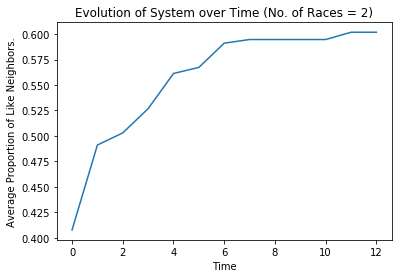

The segregation shows an increasing trend. However, the rate of increment is decreasing.
The following graph how the dissimarity measure changes over time:


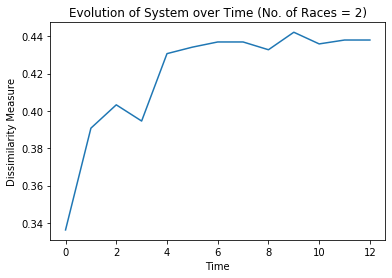

The dissimilarity measure shows an increasing trend. However, the rate of increment is decreasing.


In [9]:
q1()

### Extra Credit 1: Modifying the function q1 for 3 Races

In [8]:
def q1_3races(outputDirectoryString='aumrawal_hw1_outputs'):
    races = np.array([0,1,2,3])
    props = np.array([.3,.3,.3,.1])
    E=Environment(races,props)
    E.resetLine()
    E.runUntilConverged()
    
    print("---- Converged Distribution ----\n")
    print(E)
    print("--------------------------------\n")
    print("The following graph how the average proportion of like neighbors taken across all neighbors changes over time:")
    f = plt.figure()
    plt.plot(E.segregation)
    plt.title('Evolution of System over Time (No. of Races = 3)')
    plt.xlabel('Time')
    plt.ylabel('Average Proportion of Like Neighbors')
    plt.show()
    f.savefig(os.getcwd()+"/"+outputDirectoryString+"/aumrawal_hw1_q1_2.pdf", bbox_inches='tight')
    print('The segregation shows an increasing trend. However, the rate of increment is decreasing.')
    
    print("The following graph how the dissimarity measure changes over time:")
    f = plt.figure()
    plt.plot(E.dissimilarity)
    plt.title('Evolution of System over Time (No. of Races = 3)')
    plt.xlabel('Time')
    plt.ylabel('Dissimilarity Measure')
    plt.show()
    f.savefig(os.getcwd()+"/"+outputDirectoryString+"/aumrawal_hw1_q1_3.pdf", bbox_inches='tight')
    print('The dissimilarity measure shows an increasing trend. However, the rate of increment is decreasing.')

---- Converged Distribution ----

[[1. 1. 2. 0. 0. 0. 3. 1. 1. 1.]
 [1. 1. 0. 1. 1. 1. 3. 0. 1. 1.]
 [1. 3. 3. 1. 1. 1. 3. 2. 0. 0.]
 [1. 3. 3. 2. 1. 1. 1. 0. 1. 1.]
 [1. 2. 2. 2. 1. 1. 1. 0. 3. 2.]
 [2. 0. 2. 2. 0. 0. 1. 0. 3. 2.]
 [2. 2. 2. 0. 0. 0. 1. 2. 2. 2.]
 [2. 2. 2. 2. 2. 0. 0. 2. 2. 0.]
 [2. 2. 2. 2. 0. 0. 0. 2. 0. 3.]
 [2. 0. 0. 1. 0. 0. 0. 0. 0. 1.]]
--------------------------------

The following graph how the average proportion of like neighbors taken across all neighbors changes over time:


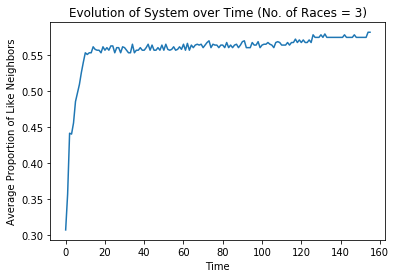

The segregation shows an increasing trend. However, the rate of increment is decreasing.
The following graph how the dissimarity measure changes over time:


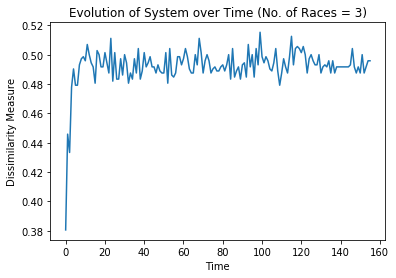

The dissimilarity measure shows an increasing trend. However, the rate of increment is decreasing.


In [9]:
q1_3races()

#### Another way of measuring Segregation:

The index of dissimilarity (Michael J. White, 1986, "Segregation and Diversity Measures in Population Distribution." Population Index, Vol. 52, 198-221.) is defined as follows:

$ \frac{1}{2}\sum_{i}^{n}|\big({\frac{1_i}{1_T} - \frac{2_i}{2_T}}\big)|$

where $1_i:$ no. of 1's in the neighborhood of i, $2_i:$ no. of 2's in the neighborhood of i, $1_T:$ total no. of 1's in the population, and $1_T:$ total no. of 2's in the population.